# Clustering Assignment 

In [27]:
#Importing numpy library for matrix operations
import numpy as np

#Importing padas Library for data handling
import pandas as pd

#Libraries for plots
import seaborn as sns
import plotly.express as px #For 3D plots
import matplotlib.pyplot as plt

In [28]:
#Importing data as dataFrame using pd.read_csv() method
df = pd.read_csv('SleepQuality.csv')
df.head()

,swsLengthHR,swsTimeHR,swsLengthT,swsTimeT,decreasePercentageT,swsTimeM,swsLengthM,decreasePercentageM,amountAsleep,amountAwake,sleepEfficiency,timesAwoken,epochCapacity,epochPeak,epochPeakCounter,stormPeak,largestStorm,timesEdaStorm,meanEdaStorm,lengthEdaStorm
0,0.18416,0.12500,0.51483,0.17241,0.74770,0.18421,0.40978,0.77318,0.25377,0.15766,0.87456,0.12903,-0.21559,0.19061,-0.10638,0.16322,0.04184,0.44231,0.00550,-0.21351
1,0.32127,0.16667,0.05463,0.03448,0.67481,0.07895,-0.58934,0.69403,0.20452,0.13063,0.86445,0.19355,-0.45059,0.18076,-0.53841,0.12895,0.03104,0.25962,0.00638,-0.52758
2,0.24143,0.12500,0.00000,0.00000,0.70960,0.18421,0.13056,0.72889,0.26030,0.06306,0.94711,0.06452,-0.59832,0.19577,-0.54688,-0.14439,0.01080,0.33654,0.00347,-0.56527
3,0.21397,0.12500,0.13443,0.03448,0.66302,0.10526,-0.24984,0.68084,0.22513,0.14414,0.86622,0.09677,-0.43695,0.24985,-0.39440,-0.01412,0.05263,0.29808,0.00579,-0.48152
4,0.26788,0.12500,0.07161,0.03448,0.71707,0.02632,-0.89690,0.79251,0.21658,0.16216,0.84675,0.16129,-0.42434,0.17387,-0.41981,-0.30115,0.01754,0.36538,0.00342,-0.52340


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   swsLengthHR          218 non-null    float64
 1   swsTimeHR            218 non-null    float64
 2   swsLengthT           218 non-null    float64
 3   swsTimeT             218 non-null    float64
 4   decreasePercentageT  218 non-null    float64
 5   swsTimeM             218 non-null    float64
 6   swsLengthM           218 non-null    float64
 7   decreasePercentageM  218 non-null    float64
 8   amountAsleep         218 non-null    float64
 9   amountAwake          218 non-null    float64
 10  sleepEfficiency      218 non-null    float64
 11  timesAwoken          218 non-null    float64
 12  epochCapacity        218 non-null    float64
 13  epochPeak            218 non-null    float64
 14  epochPeakCounter     218 non-null    float64
 15  stormPeak            218 non-null    flo

In [30]:
n = np.array([[1,2],
         [1.5,1.8],
         [5,8],
         [8,8],
         [1,0.6],
         [9,11]])

In [31]:
class K_Means_clustering:
    def __init__(self, k = 3, tolerance=0.001, iterations=500):
        self.k = k
        self.tolerance = tolerance
        self.iterations = iterations
        
    def fit(self,data):
        self.centroids = {}
        np.random.seed(0)
        number_of_rows = data.shape[0]
        random_indices = np.random.choice(number_of_rows, size=self.k, replace=False)
        random_centroids = data[random_indices, :]
        for i in range(self.k):
            self.centroids[i] = random_centroids[i]

        for i in range(self.iterations):
            self.clusters = {}

            for i in range(self.k):
                self.clusters[i] = []

            for featureset in data:
                distances = [np.linalg.norm(featureset - self.centroids[centroid]) for centroid in self.centroids]
                cluster = distances.index(min(distances))
                self.clusters[cluster].append(featureset)
                
        
            prev_centroids = dict(self.centroids)

            for cluster in self.clusters:
                self.centroids[cluster] = np.average(self.clusters[cluster],axis=0)

            optimized = True

            for c in self.centroids:
                original_centroid = prev_centroids[c]
                current_centroid = self.centroids[c]
                if np.sum((current_centroid-original_centroid)/original_centroid*100.0) > self.tolerance:
                    #print(np.sum((current_centroid-original_centroid)/original_centroid*100.0))
                    optimized = False

            if optimized:  
                break

In [32]:
def Dunn_Index(clusters, centroids):
    
    cluster_distances = [np.linalg.norm(centroids[0] - centroids[i]) for i in range(1,len(centroids))]
    Inter_cluster_distance = round(min(cluster_distances),3)
    
    intra_cluster_distances = {}
    for cluster in clusters:
        distances = [np.linalg.norm(centroids[cluster] - clusters[cluster][i]) for i in range(0,len(clusters[cluster]))]
        intra_cluster_distances[cluster] = round(max(distances),3)
        DI = Inter_cluster_distance/max(intra_cluster_distances.values())
    return round(DI,3)

## 1. K-means clustering with different number of clusters<br>
**a) Run K-means on the entire SleepQuality dataset with the following 2 variables:'swsLengthM', and 'epochCapacity' with number of clusters K = 2. Plot your clusters using a 3D scatter plot and report (print) the centroid locations. Based on this plot, what are your thoughts on the generated clusters?**


In [33]:
clf = K_Means_clustering(k = 2)

In [34]:
features_1a = df[['swsLengthM', 'epochCapacity']]
clf.fit(np.array(features_1a))

In [35]:
X_centroids = [clf.centroids[i][0] for i in range(len(clf.centroids))]
Y_centroids = [clf.centroids[i][1] for i in range(len(clf.centroids))]

In [36]:
X_cluster_0 = [i[0] for i in clf.clusters[0]]
Y_cluster_0 = [i[1] for i in clf.clusters[0]]

df_cluster_0 = pd.DataFrame([X_cluster_0,Y_cluster_0], index = ['X','Y']).transpose()
df_cluster_0['cluster'] = 0

X_cluster_1 = [i[0] for i in clf.clusters[1]]
Y_cluster_1 = [i[1] for i in clf.clusters[1]]

df_cluster_1 = pd.DataFrame([X_cluster_1,Y_cluster_1], index = ['X','Y']).transpose()
df_cluster_1['cluster'] = 1

In [37]:
color = {0:'#66CDAA',1:'#E3CF57',2:'#00008B',3:'#7FFF00',4:'#6495ED',5:'#A2CD5A',6:'#1C1C1C',7:'#FF6EB4',8:'#AB82FF',9:'#8B5A00'}
final_cluster_df = df_cluster_0.append(df_cluster_1)
final_cluster_df.cluster = final_cluster_df.cluster.map(color)
final_cluster_df.sample(5)

,X,Y,cluster
22,-1.00196,-0.98104,#E3CF57
47,0.88898,0.10862,#66CDAA
21,0.34556,-0.37892,#66CDAA
24,-1.00196,1.43229,#E3CF57
58,0.21577,0.55248,#E3CF57


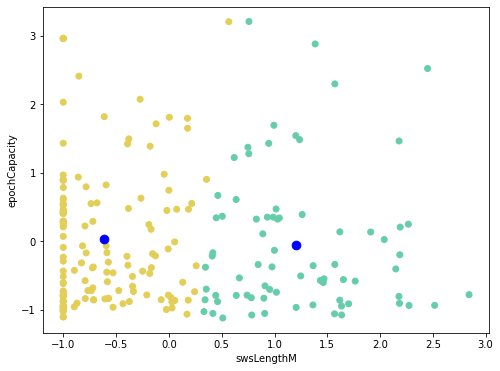

In [38]:
plt.figure(figsize=[8,6])
plt.scatter(x =final_cluster_df.X , y= final_cluster_df.Y , c= final_cluster_df.cluster)
plt.scatter(x = X_centroids[0], y = Y_centroids[0], s= 75, c = 'blue')
plt.scatter(x = X_centroids[1], y = Y_centroids[1], s= 75, c = 'blue')
plt.xlabel('swsLengthM')
plt.ylabel('epochCapacity')
plt.show()

In [39]:
Dunn_Index(clf.clusters,clf.centroids)

0.538

**b) Test with different numbers of clusters K, running from K = 2 to K = 10 using the same variables in 1a. According to the scatter plots, which number of clusters do you think is the most appropriate? Justify your response.**

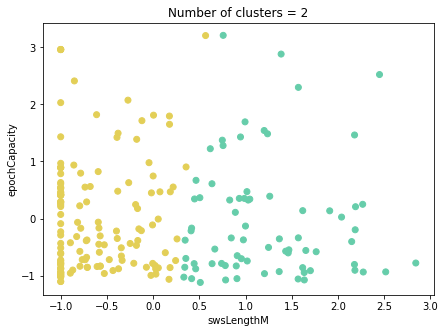

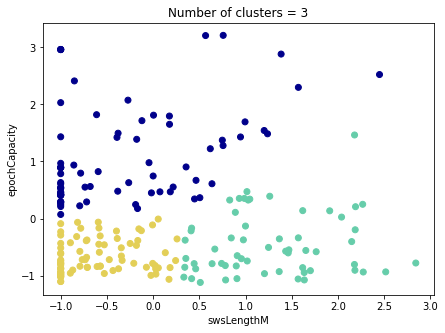

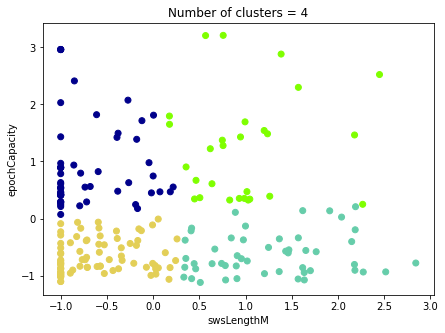

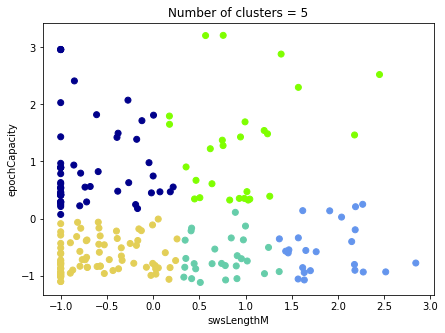

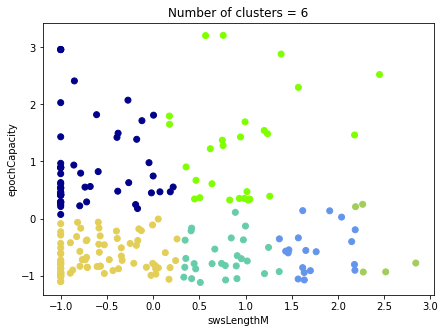

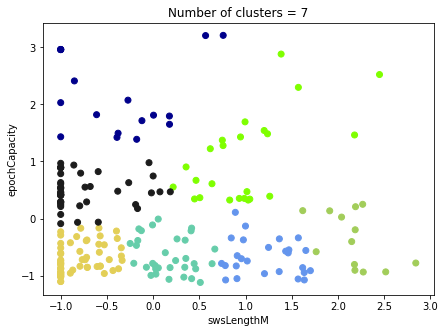

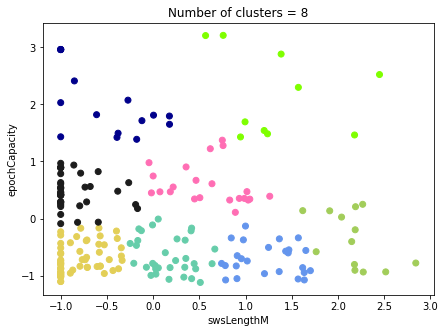

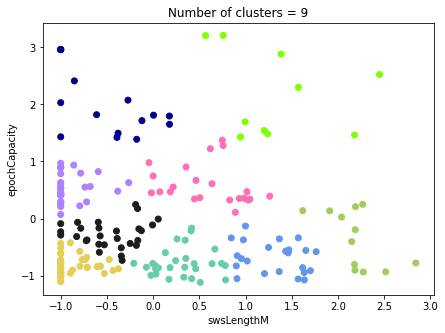

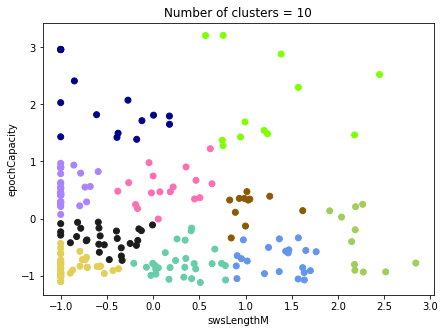

In [40]:
features = df[['swsLengthM', 'epochCapacity']]
Dunn_indices = []
for i in range(2,11):
    K_means = K_Means_clustering(k = i)
    K_means.fit(np.array(features))
    
    final_cluster_df = pd.DataFrame(columns = ['X','Y','cluster'])
    for j in range(i):
        
        X_cluster = [fea[0] for fea in K_means.clusters[j]]
        Y_cluster = [fea[1] for fea in K_means.clusters[j]]

        df_cluster = pd.DataFrame([X_cluster,Y_cluster], index = ['X','Y']).transpose()
        df_cluster['cluster'] = j
        
        final_cluster_df = final_cluster_df.append(df_cluster)
        if final_cluster_df.shape[0] == features.shape[0] :
            final_cluster_df.cluster = final_cluster_df.cluster.map(color)   
            plt.figure(figsize=[7,5])    
            plt.scatter(x =final_cluster_df.X , y= final_cluster_df.Y , c= final_cluster_df.cluster)
            plt.xlabel('swsLengthM')
            plt.ylabel('epochCapacity')
            plt.title('Number of clusters = '+ str(i))
            plt.show()
            #Calculating Dunn index
            index = Dunn_Index(K_means.clusters, K_means.centroids)
            Dunn_indices.append(index)

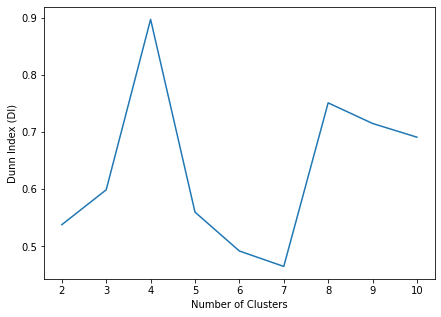

In [41]:
x = [i for i in range(2,11)]
plt.figure(figsize=[7,5])
plt.plot(x,Dunn_indices)
plt.xlabel('Number of Clusters')
plt.ylabel('Dunn Index (DI)')
plt.show()

From the above plot we can see dunn index is more for cluster 4.

In [42]:
print('Maximum DI for cluster 4 is '+ str(max(Dunn_indices)))

Maximum DI for cluster 4 is 0.897


## 2. K-means clustering with different variables and sample size (30 points)

**A) Based on the best number of clusters you obtained in problem 1c and the 2
variables, does adding the ‘lengthEdaStorm’ variable (total 3 variables)
improve clustering results? Use scatter plots or any other equivalent method to
justify your response.**

In [43]:
features = df[['swsLengthM', 'epochCapacity','lengthEdaStorm']]
Dunn_indices = []
for i in range(4,5):
    K_means = K_Means_clustering(k = i)
    K_means.fit(np.array(features))
    
    final_cluster_df = pd.DataFrame(columns = ['X','Y','Z','cluster'])
    for j in range(i):
        
        swsLengthM = [fea[0] for fea in K_means.clusters[j]]
        epochCapacity = [fea[1] for fea in K_means.clusters[j]]
        lengthEdaStorm = [fea[2] for fea in K_means.clusters[j]]

        df_cluster = pd.DataFrame([swsLengthM,epochCapacity,lengthEdaStorm], index = ['swsLengthM','epochCapacity','lengthEdaStorm']).transpose()
        df_cluster['cluster'] = j
        
        final_cluster_df = final_cluster_df.append(df_cluster)
        if final_cluster_df.shape[0] == features.shape[0] :
            final_cluster_df.cluster = final_cluster_df.cluster.map(color)   
            #Calculating Dunn index
            index = Dunn_Index(K_means.clusters, K_means.centroids)
            Dunn_indices.append(index)

In [44]:
px.scatter_3d(final_cluster_df, x='swsLengthM', y='epochCapacity', z='lengthEdaStorm',color='cluster')

In [45]:
Dunn_indices

[0.843]

**B) Based on the model in problem 2a, does adding the ‘epochPeakCounter’ and
‘stormPeak’ variables (total 5 variables) improve the clustering results? Plot the
results and compute the dunn index to justify your response.**

In [46]:
features = df[['swsLengthM', 'epochCapacity','lengthEdaStorm','epochPeakCounter','stormPeak']]
K_means = K_Means_clustering(k = 4)
K_means.fit(np.array(features))

**Dunn Index for the model with five features**

In [47]:
print(Dunn_Index(K_means.clusters, K_means.centroids))

0.502


**C) Randomly sample 100 observations and 50 observations from the data and
re-run 2a and 2b, for each sample size. Plot the clustering results and compute
dunn index for each sample size and compare the results with 100 and 50
observations vs the entire dataset. Justify what you observe.**

- Creating a cluster with the features `['swsLengthM', 'epochCapacity','lengthEdaStorm']` and sample size 100

In [48]:
features = df[['swsLengthM', 'epochCapacity','lengthEdaStorm']].sample(100)
Dunn_indices = []
for i in range(4,5):
    K_means = K_Means_clustering(k = i)
    K_means.fit(np.array(features))
    
    final_cluster_df = pd.DataFrame(columns = ['X','Y','Z','cluster'])
    for j in range(i):
        
        swsLengthM = [fea[0] for fea in K_means.clusters[j]]
        epochCapacity = [fea[1] for fea in K_means.clusters[j]]
        lengthEdaStorm = [fea[2] for fea in K_means.clusters[j]]

        df_cluster = pd.DataFrame([swsLengthM,epochCapacity,lengthEdaStorm], 
                                  index = ['swsLengthM','epochCapacity','lengthEdaStorm']).transpose()
        df_cluster['cluster'] = j
        
        final_cluster_df = final_cluster_df.append(df_cluster)
        if final_cluster_df.shape[0] == features.shape[0] :
            final_cluster_df.cluster = final_cluster_df.cluster.map(color)   
            #Calculating Dunn index
            index = Dunn_Index(K_means.clusters, K_means.centroids)
            Dunn_indices.append(index)

In [49]:
px.scatter_3d(final_cluster_df, x='swsLengthM', y='epochCapacity', z='lengthEdaStorm',color='cluster')

In [50]:
Dunn_indices

[0.616]

- Creating a cluster with the features `['swsLengthM', 'epochCapacity','lengthEdaStorm']` and `sample size 50`

In [51]:
features = df[['swsLengthM', 'epochCapacity','lengthEdaStorm']].sample(50)
Dunn_indices = []
for i in range(4,5):
    K_means = K_Means_clustering(k = i)
    K_means.fit(np.array(features))
    
    final_cluster_df = pd.DataFrame(columns = ['X','Y','Z','cluster'])
    for j in range(i):
        
        swsLengthM = [fea[0] for fea in K_means.clusters[j]]
        epochCapacity = [fea[1] for fea in K_means.clusters[j]]
        lengthEdaStorm = [fea[2] for fea in K_means.clusters[j]]

        df_cluster = pd.DataFrame([swsLengthM,epochCapacity,lengthEdaStorm], 
                                  index = ['swsLengthM','epochCapacity','lengthEdaStorm']).transpose()
        df_cluster['cluster'] = j
        
        final_cluster_df = final_cluster_df.append(df_cluster)
        if final_cluster_df.shape[0] == features.shape[0] :
            final_cluster_df.cluster = final_cluster_df.cluster.map(color)   
            #Calculating Dunn index
            index = Dunn_Index(K_means.clusters, K_means.centroids)
            Dunn_indices.append(index)

In [52]:
px.scatter_3d(final_cluster_df, x='swsLengthM', y='epochCapacity', z='lengthEdaStorm',color='cluster')

In [53]:
Dunn_indices

[0.796]

- Creating a cluster with the features `['swsLengthM', 'epochCapacity','lengthEdaStorm','epochPeakCounter','stormPeak']` and `sample size 100`

In [54]:
features = df[['swsLengthM', 'epochCapacity','lengthEdaStorm','epochPeakCounter','stormPeak']].sample(100)
K_means = K_Means_clustering(k = 4)
K_means.fit(np.array(features))

In [55]:
print('DI for the above model is ' + str(Dunn_Index(K_means.clusters, K_means.centroids)))

DI for the above model is 1.24


- Creating a cluster with the features `['swsLengthM', 'epochCapacity','lengthEdaStorm','epochPeakCounter','stormPeak']` and `sample size 500`

In [56]:
features = df[['swsLengthM', 'epochCapacity','lengthEdaStorm','epochPeakCounter','stormPeak']].sample(50)
K_means = K_Means_clustering(k = 4)
K_means.fit(np.array(features))

In [57]:
print('DI for the above model is ' + str(Dunn_Index(K_means.clusters, K_means.centroids)))

DI for the above model is 0.753


Text(0.5, 1.0, 'Dunn Index vs Sample size')

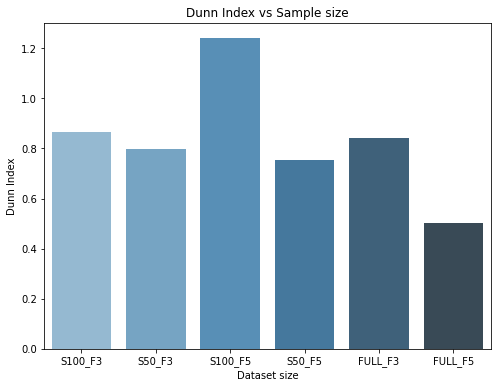

In [58]:
columns = ['S100_F3','S50_F3', 'S100_F5', 'S50_F5','FULL_F3','FULL_F5']
values = [0.864,0.796,1.24,0.753,0.843,0.502]
plt.figure(figsize=[8,6])
sns.barplot(x=columns, y=values, palette="Blues_d")
plt.xlabel('Dataset size')
plt.ylabel('Dunn Index')
plt.title('Dunn Index vs Sample size')

**D (Bonus): What happens to the relative positioning of the centroids as you sample
fewer observations (100, 50, 25) from the data? Do the centroids go farther apart
or do they get closer after your clustering algorithm has converged? Justify why.
Plot your findings (sample size (x-axis) vs Dunn Index (y-axis)). (Bonus: 10
points)**

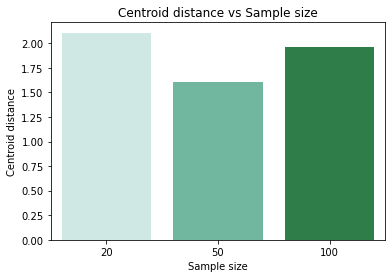

In [59]:
clf = K_Means_clustering(k = 2)
DI = []
for sample_size in [100,50,20]:
    features_1a = df[['swsLengthM', 'epochCapacity']].sample(sample_size)
    clf.fit(np.array(features_1a))
    Centroid_distance = round(np.linalg.norm(clf.centroids[0]-clf.centroids[1]),3)
    DI.append(Dunn_Index(clf.clusters, clf.centroids))
sns.barplot(x=[100 , 50, 20], y=[1.961,1.601,2.107],palette="BuGn")
plt.xlabel('Sample size')
plt.ylabel('Centroid distance')
plt.title('Centroid distance vs Sample size')
plt.show()

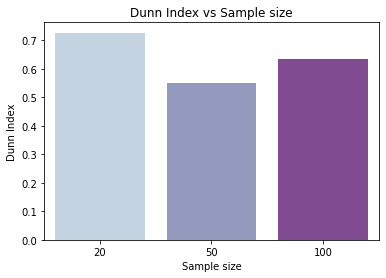

In [60]:
sns.barplot(x=[100 , 50, 20], y=DI, palette="BuPu")
plt.xlabel('Sample size')
plt.ylabel('Dunn Index')
plt.title('Dunn Index vs Sample size')
plt.show()

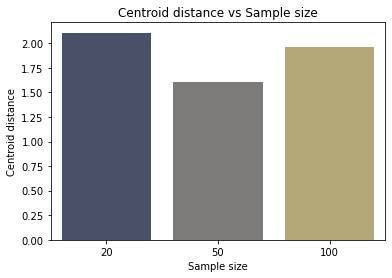

In [61]:
clf = K_Means_clustering(k = 2)
DI = []
for sample_size in [100,50,20]:
    features_1a = df[['swsLengthM', 'epochCapacity','lengthEdaStorm','epochPeakCounter','stormPeak']].sample(sample_size)
    clf.fit(np.array(features_1a))
    Centroid_distance = round(np.linalg.norm(clf.centroids[0]-clf.centroids[1]),3)
    DI.append(Dunn_Index(clf.clusters, clf.centroids))
sns.barplot(x=[100 , 50, 20], y=[1.961,1.601,2.107], palette="cividis")
plt.xlabel('Sample size')
plt.ylabel('Centroid distance')
plt.title('Centroid distance vs Sample size')
plt.show()

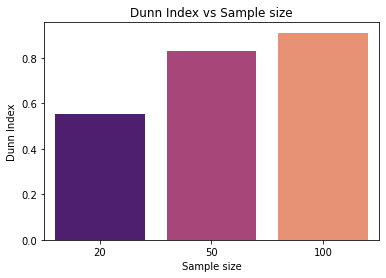

In [62]:
sns.barplot(x=[100 , 50, 20], y=DI , palette="magma")
plt.xlabel('Sample size')
plt.ylabel('Dunn Index')
plt.title('Dunn Index vs Sample size')
plt.show()